In [43]:
from typing import List, Optional

import cv2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from jh1.visual import instantiate_detector, find_april_tags, count_clusters, TagVariationalCluster, PIECE_TAG_IDS, \
    HomographySolver
from jh1.visual.video import WebcamSource


In [36]:
cam = WebcamSource(cam_id=0)

In [37]:
img = cam.read_frame()

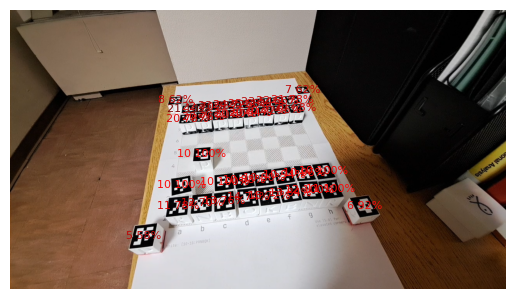

In [38]:
detector = instantiate_detector()
detections = find_april_tags(img, detector)
clusters: List[TagVariationalCluster] = count_clusters(detections)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for cluster in clusters:
    text = f"{cluster.tag_id} {cluster.detection_count / 50:.0%}"
    x, y = cluster.position
    color_intensity = 100 + (cluster.detection_count / 50) * 150
    color = (color_intensity / 255, 10 / 255, 10 / 255)  # Normalize RGB to 0–1 range
    plt.text(x, y, text, fontsize=8, color=color, ha='center', va='center')

plt.axis('off')
plt.show()

In [39]:
corners_tags: List[Optional[TagVariationalCluster]] = [None] * 4
pieces_tags: List[TagVariationalCluster] = []

for cluster in clusters:
    print(cluster.tag_id)
    if cluster.is_piece_tag():
        pieces_tags.append(cluster)
    elif cluster.get_vert_idx_if_corner() is not None:
        corners_tags[cluster.get_vert_idx_if_corner()] = cluster

10
10
10
10
10
10
10
10
11
11
12
12
5
6
13
13
20
20
20
20
20
20
20
20
21
21
22
22
7
8
14
15
23
23
24
25


In [57]:
solver = HomographySolver(corners_tags)
board_bins = solver.bin_pieces(pieces_tags)
certainty_grid = solver.get_certainty_grid(board_bins)

cmap = mpl.colormaps.get_cmap('RdYlGn')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

files = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
ranks = ['1', '2', '3', '4', '5', '6', '7', '8']

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.invert_yaxis()

# Draw grid
for i in range(9):
    ax.axhline(i, color='black', linewidth=0.5)
    ax.axvline(i, color='black', linewidth=0.5)

# Annotate files and ranks
for i in range(8):
    ax.text(i + 0.5, 8.3, files[i], ha='center', va='bottom', fontsize=9)
    ax.text(-0.2, 7 - i + 0.5, ranks[i], ha='right', va='center', fontsize=9)

# Draw pieces and certainty overlay
for i in range(8):
    for j in range(8):
        certainty = certainty_grid[i, j]
        if certainty > 0:
            color = cmap(norm(certainty))
            ax.add_patch(plt.Rectangle((j, 7 - i), 1, 1, color=color, alpha=0.6))

        bin_tags = board_bins[i][j]
        if bin_tags:
            labels = [PIECE_TAG_IDS.get(t.tag_id, str(t.tag_id)) for t in bin_tags]
            text = ", ".join(labels)
            ax.text(j + 0.5, 7 - i + 0.5, text, ha='center', va='center', fontsize=10, weight='bold')

# Add colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('proba', fontsize=9)

plt.xticks([])
plt.yticks([])
plt.show()


NameError: name 'HomographySolver' is not defined